[Oregon Curriculum Network](http://4dsolutions.net/ocn/)<br/>
[School of Tomorrow](School_of_Tomorrow.ipynb)


## The TetraBook and S3

A Jupyter Notebook for the School of Tomorrow.

With thanks to Alan Michelson on Synergeo, for circling back to it, and to David Koski, for the TetraBook meme in the first place.

[View in nbviewer](https://nbviewer.org/github/4dsolutions/School_of_Tomorrow/blob/master/TetraBook.ipynb)

In [1]:
from IPython.display import YouTubeVideo

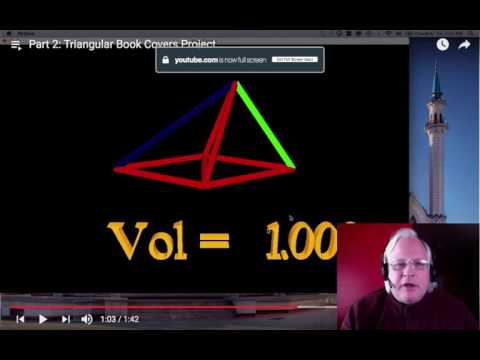

In [2]:
YouTubeVideo("WKrGmuXW-RQ")

In [3]:
import numpy as np
import pandas as pd

In [4]:
import math

In [5]:
root3 = math.sqrt(3)
S3 = math.sqrt(9/8)

In [6]:
2 * root3 # book cover tip to book cover tip

3.4641016151377544

In [7]:
theta_deg = np.arange(0, 181) # degrees

In [8]:
front_cover_tip = (-root3, 0.0)  # left
back_cover_tip  = ( root3, 0.0)  # right

In [9]:
page_tip_deg = lambda deg: (-root3 * np.cos(np.radians(deg)), root3 * (np.sin(np.radians(deg))))
page_tip_rad = lambda rad: (-root3 * np.cos(rad), root3 * np.sin(rad))

In [10]:
page_tip_rad(math.pi/2)

(-1.0605752387249068e-16, 1.7320508075688772)

In [11]:
dihedral_angle_of_reg_tet = math.acos(1/3)
math.degrees(dihedral_angle_of_reg_tet)

70.52877936550931

In [12]:
def distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [13]:
distance(front_cover_tip, back_cover_tip)

3.4641016151377544

In [14]:
distance(front_cover_tip, page_tip_deg(90))

2.449489742783178

In [15]:
distance(front_cover_tip, page_tip_deg(180))

3.4641016151377544

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/46149255411/in/photolist-2ncC3Xn-2mZypyZ-2dj3ZQP-2dj3ZPr-Sb76Cn-S6Quyu-S6QuFd" title="tetrabook2"><img src="https://live.staticflickr.com/4850/46149255411_31eb8869cf.jpg" width="500" height="341" alt="tetrabook2"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [16]:
import imp

/var/folders/z2/2d18w70j4yj5hqyn50kt8cn40000gn/T/ipykernel_27093/713651319.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [17]:
import tetravolume
imp.reload(tetravolume)

<module 'tetravolume' from '/Users/kirbyurner/Documents/School_of_Tomorrow/tetravolume.py'>

In [18]:
import tetravolume as tv
from tetravolume import Tetrahedron

In [19]:
tv.D

1

In [20]:
test_tet = Tetrahedron(1,1,1,1,1,1)

In [21]:
test_tet.ivm_volume()

1.00000000000000

In [22]:
def get_volume_rad(theta):
    return Tetrahedron(1,1,1,1,1, distance(back_cover_tip, page_tip_rad(theta))/2).ivm_volume()

In [23]:
get_vol = np.vectorize(get_volume_rad)

In [24]:
table = pd.DataFrame({"theta_deg":theta_deg, "theta_rad":np.radians(theta_deg)})

In [25]:
table.head()

,theta_deg,theta_rad
0,0,0.000000
1,1,0.017453
2,2,0.034907
3,3,0.052360
4,4,0.069813


In [26]:
table["alt"] = table.theta_rad.apply(lambda r: root3 * math.sin(r))
table["tvs"] = table.theta_rad.apply(get_volume_rad)
table["x"]   = table.theta_rad.apply(lambda r: root3 * math.cos(r))

In [27]:
table

,theta_deg,theta_rad,alt,tvs,x
0,0,0.000000,0.000000e+00,2.10734242554470e-8,1.732051
1,1,0.017453,3.022845e-02,0.0185110724097577,1.731787
2,2,0.034907,6.044770e-02,0.0370165061675079,1.730996
3,3,0.052360,9.064854e-02,0.0555106643389176,1.729677
4,4,0.069813,1.208218e-01,0.0739879134242018,1.727832
...,...,...,...,...,...
176,176,3.071779,1.208218e-01,0.0739879134242003,-1.727832
177,177,3.089233,9.064854e-02,0.0555106643389016,-1.729677
178,178,3.106686,6.044770e-02,0.0370165061675049,-1.730996
179,179,3.124139,3.022845e-02,0.0185110724097397,-1.731787


In [28]:
table = table.reindex(columns=["theta_deg", "theta_rad", "x", "alt", "tvs"])
table

,theta_deg,theta_rad,x,alt,tvs
0,0,0.000000,1.732051,0.000000e+00,2.10734242554470e-8
1,1,0.017453,1.731787,3.022845e-02,0.0185110724097577
2,2,0.034907,1.730996,6.044770e-02,0.0370165061675079
3,3,0.052360,1.729677,9.064854e-02,0.0555106643389176
4,4,0.069813,1.727832,1.208218e-01,0.0739879134242018
...,...,...,...,...,...
176,176,3.071779,-1.727832,1.208218e-01,0.0739879134242003
177,177,3.089233,-1.729677,9.064854e-02,0.0555106643389016
178,178,3.106686,-1.730996,6.044770e-02,0.0370165061675049
179,179,3.124139,-1.731787,3.022845e-02,0.0185110724097397


In [29]:
pd.reset_option("display.precision", 5)
pd.set_option("display.float_format", "{:.3f}".format)
table.head()

,theta_deg,theta_rad,x,alt,tvs
0,0,0.000,1.732,0.000,2.10734242554470e-8
1,1,0.017,1.732,0.030,0.0185110724097577
2,2,0.035,1.731,0.060,0.0370165061675079
3,3,0.052,1.730,0.091,0.0555106643389176
4,4,0.070,1.728,0.121,0.0739879134242018


In [30]:
table["cus"] = table.tvs.apply(lambda c: c/S3)
table.head()

,theta_deg,theta_rad,x,alt,tvs,cus
0,0,0.000,1.732,0.000,2.10734242554470e-8,1.98682149251302e-8
1,1,0.017,1.732,0.030,0.0185110724097577,0.0174524064372998
2,2,0.035,1.731,0.060,0.0370165061675079,0.0348994967025047
3,3,0.052,1.730,0.091,0.0555106643389176,0.0523359562429586
4,4,0.070,1.728,0.121,0.0739879134242018,0.0697564737441284


In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

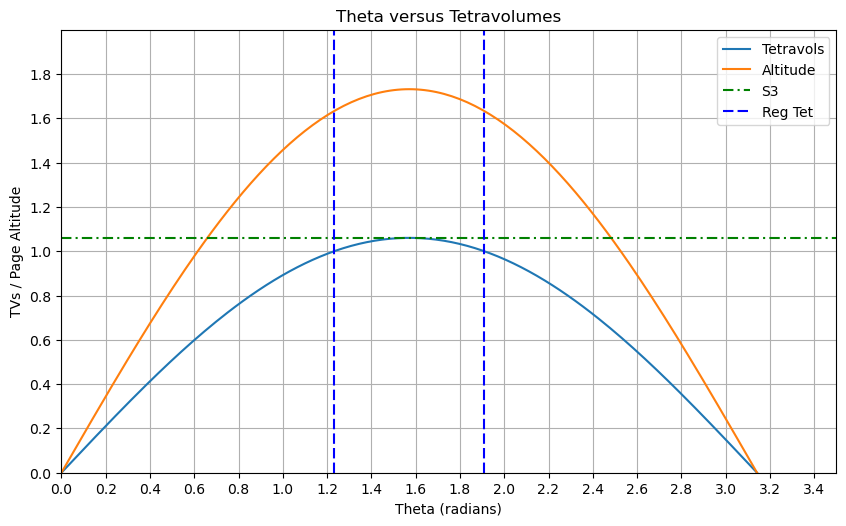

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('theta_rad', 'tvs', data=table, label="Tetravols")
ax.plot('theta_rad', 'alt', data=table, label="Altitude")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(0,3.5)
ax.set_xticks(np.arange(0, 3.5, 0.2))
ax.set_xlabel("Theta (radians)")

ax.set_ylim(0,2.0)
ax.set_yticks(np.arange(0, 2.0, 0.2))
ax.set_ylabel("TVs / Page Altitude")
ax.set_title("Theta versus Tetravolumes")

ax.grid()

ax.axhline(1.06066, color='green', ls="-", dashes = (5, 2, 1, 2), label="S3")
ax.axvline(math.acos(1/3), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(math.acos(-1/3), color='blue', dashes = (5, 2))

ax.legend()

plt.show()

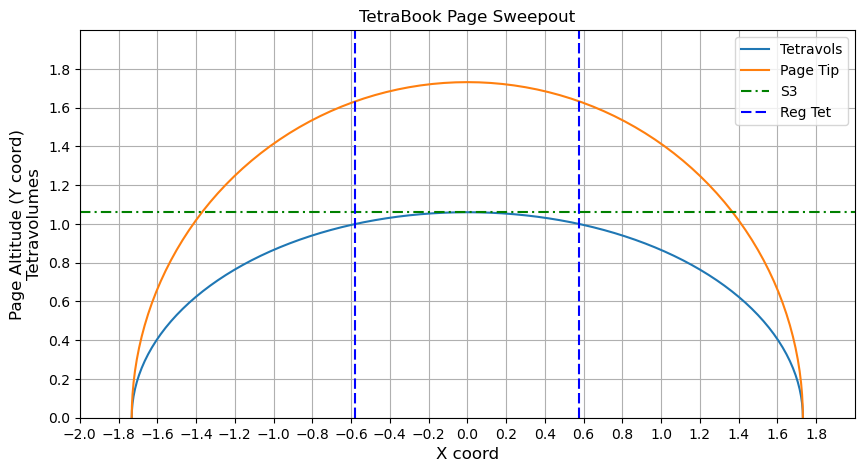

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('x', 'tvs', data=table, label="Tetravols")
ax.plot('x', 'alt', data=table, label="Page Tip")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(-2,2)
ax.set_xticks(np.arange(-2, 2, 0.2))
ax.set_xlabel("X coord", fontsize=12)

ax.yaxis.set_label_position("left")
ax.set_ylabel("Page Altitude (Y coord)\nTetravolumes", fontsize=12)
ax.set_title("TetraBook Page Sweepout")

ax.set_ylim(0,2)
ax.set_yticks(np.arange(0, 2.0, 0.2))

ax.grid()

ax.axhline(1.06066, color='green', ls="-", dashes = (5, 2, 1, 2), label="S3")
ax.axvline(root3 * math.cos(math.acos( 1/3)), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(root3 * math.cos(math.acos(-1/3)), color='blue', dashes = (5, 2))

ax.legend()

plt.savefig("tetrabook_plot.png", format="png", bbox_inches="tight")
plt.show()

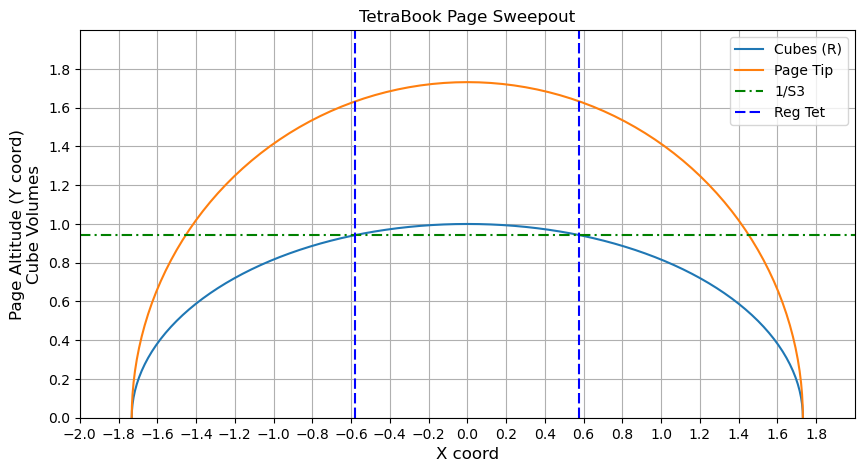

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot('x', 'cus', data=table, label="Cubes (R)")
ax.plot('x', 'alt', data=table, label="Page Tip")

# ax.set_box_aspect(1)
ax.set_aspect('equal')

ax.set_xlim(-2,2)
ax.set_xticks(np.arange(-2, 2, 0.2))
ax.set_xlabel("X coord", fontsize=12)

ax.yaxis.set_label_position("left")
ax.set_ylabel("Page Altitude (Y coord)\nCube Volumes", fontsize=12)
ax.set_title("TetraBook Page Sweepout")

ax.set_ylim(0,2)
ax.set_yticks(np.arange(0, 2.0, 0.2))

ax.grid()

ax.axhline(1/S3, color='green', ls="-", dashes = (5, 2, 1, 2), label="1/S3")
ax.axvline(root3 * math.cos(math.acos( 1/3)), color='blue', dashes = (5, 2), label="Reg Tet")
ax.axvline(root3 * math.cos(math.acos(-1/3)), color='blue', dashes = (5, 2))

ax.legend()

plt.savefig("tetrabook_cu_plot.png", format="png", bbox_inches="tight")
plt.show()

## Recap 
<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/9533679790/in/album-72157624750749042/" title="Triangular Book with One Page"><img src="https://live.staticflickr.com/7450/9533679790_b916fba31f_w.jpg" width="400" height="300" alt="Triangular Book with One Page"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


In [35]:
from math import sqrt as rt2
import sympy as sym
from sympy import Eq, Number

In [36]:
book_edge = sym.symbols(["book_edge", "altitude"])
book_edge = Number(1)
altitude = sym.sqrt(book_edge**2 - (book_edge/2)**2)
altitude

sqrt(3)/2

In [37]:
right_tet_hyp = sym.sqrt(2 * altitude**2)

In [38]:
right_tet_hyp

sqrt(6)/2

In [39]:
tv = Tetrahedron(1,1,1,1,1,right_tet_hyp)

In [40]:
tv.xyz_volume()

1

In [41]:
tv.ivm_volume()

3*sqrt(2)/4

[Another Notebook on the TetraBook](https://github.com/4dsolutions/m4w/blob/main/Tetrabook.ipynb) (M4W repo)